In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/processed/WineQT_after_EDA.csv")
df.drop(["Unnamed: 0", "quality", "Id"], axis=1, inplace=True)

In [3]:
X = df.drop(["quality_encoded"], axis=1)
y = df["quality_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
X_train_t = X_train.values.astype(np.float32)
y_train_t = y_train.values.astype(np.int32)
X_test_t = X_test.values.astype(np.float32)
y_test_t = y_test.values.astype(np.int32)

In [8]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(11,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [9]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    X_train_t, y_train_t,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5418 - loss: 1.1795   
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.6448 - loss: 0.9118
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.6413 - loss: 0.8705
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.6725 - loss: 0.7577
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.6763 - loss: 0.7573
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.7056 - loss: 0.7281
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.6651 - loss: 0.7475
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.7165 - loss: 0.6476
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.7349 - loss: 0.6030
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.7269 - loss: 0.6111
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.7427 - loss: 0.6109
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/ste

In [11]:
import matplotlib.pyplot as plt

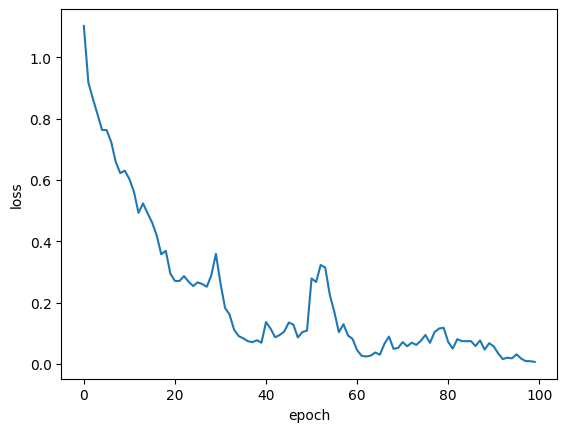

In [12]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [13]:
predictions = model.predict(X_test_t)
predicted_classes = np.argmax(predictions, axis=1)

correct = 0
for i in range(len(X_test_t)):
    print(f'{i+1}) {predictions[i]} {y_test_t[i]}')
    if predicted_classes[i] == y_test_t[i]:
        correct += 1

print(f'We got {correct} correct')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1) [7.0146250e-12 5.1353171e-09 2.4033858e-07 1.1305999e-01 8.8693959e-01
 2.4370374e-07] 4
2) [3.0769064e-11 1.0417180e-11 2.1982182e-02 9.7800797e-01 5.5114429e-06
 4.3708292e-06] 3
3) [1.0578786e-25 4.7300380e-13 1.0000000e+00 2.1917066e-09 6.5567202e-13
 6.7353179e-28] 2
4) [7.6766230e-26 2.3265597e-23 1.0000000e+00 3.8621409e-10 1.7559170e-17
 1.7320949e-23] 2
5) [2.5270072e-22 3.1167892e-12 2.7533695e-05 9.9997246e-01 6.5185674e-10
 2.5605795e-09] 3
6) [4.5787525e-16 8.0894553e-14 5.8832461e-10 1.0066405e-07 9.9999988e-01
 2.6893006e-14] 4
7) [1.7369441e-09 7.8773017e-05 4.6084014e-01 5.3908116e-01 2.5102995e-09
 2.0305266e-13] 2
8) [4.0884635e-10 1.5755054e-08 2.8323305e-03 9.9716765e-01 3.0708460e-13
 1.4550636e-19] 3
9) [7.5630585e-26 9.9999988e-01 6.3030015e-08 3.3792512e-17 0.0000000e+00
 1.2342312e-32] 2
10) [5.6521222e-18 2.8406612e-07 9.9999976e-01 6.3333477e-11 3.3859535e-10
 3.5023270e-26] 2
11) [1.0788769e-10 9.6588648e-10 1.2664

In [14]:
model.save('../models/my_wine_model.h5')